### Ceci est un titre: Occitanie polution

In [1]:
# nous allons travailler en collaboration sur ce fichier
# svp essayer de rédiger directement en pep8
# Translate in english !!!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact  # widget manipulation

pd.options.display.max_rows = 10

# A terme, notre projet devra fournir:
  + Une vidéo du niveau d'ozone en fonction du temps dans les villes d'occitanie, via certainement une map qui évolue en fonction du temps (contrainte: un cercle plus ou moins gros devra indiquer le niveau d'ozone) *DIFFICULTE +++* 
  + Un "widget" qui compare les niveaux de pollution de 3 villes grâce à des boxplot/violons *DIFFICULTE +*
  + *DIFFICULTE ++* : faire varier le widget en fonction du temps
  + Une comparaison Paris VS Montpellier *DIFFICULTE ?*

## Importation et traitement des données mensuelles:


In [3]:
from download import download

# We choose daily data
url = "https://opendata.arcgis.com/datasets/2ab16a5fb61f42c1a689fd9cc466383f_0.csv"
path_target = "datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv"
download(url, path_target, replace=True)

Successfully downloaded file to datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv


file_sizes: 10.9MB [00:23, 266kB/s]

'datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv'

In [4]:
occ = pd.read_csv(path_target)
# all data of Occitanie

occ.head(n=5) # simpliest way too watch data

,X,Y,nom_dept,nom_com,insee_com,nom_station,code_station,typologie,influence,nom_poll,id_poll_ue,valeur,unite,metrique,date_debut,date_fin,statut_valid,x_l93,y_l93,ObjectId
0,1.41861,43.5756,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain,FR50004,Urbaine,Fond,PM10,5,22.9,ug.m-3,journaliere,2020-02-21T01:00:00.000Z,2020-02-22T00:00:00.000Z,t,572227,6276450,1001
1,2.14611,43.9281,TARN,ALBI,81004,Albi Urbain,FR50026,Urbaine,Fond,NOX as NO2,9,42.0,ug.m-3,journaliere,2020-02-21T01:00:00.000Z,2020-02-22T00:00:00.000Z,t,631428,6314715,1002
2,3.86472,43.6117,HERAULT,MONTPELLIER,34172,Montpellier - Chaptal Urbain,FR50201,Urbaine,Fond,NOX as NO2,9,41.6,ug.m-3,journaliere,2020-02-21T01:00:00.000Z,2020-02-22T00:00:00.000Z,t,769827,6279565,1003
3,2.23000,43.6106,TARN,CASTRES,81065,Castres-Travet Urbain,FR50053,Urbaine,Fond,NOX as NO2,9,18.3,ug.m-3,journaliere,2020-02-21T01:00:00.000Z,2020-02-22T00:00:00.000Z,t,637820,6279364,1004
4,1.41861,43.5756,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain,FR50004,Urbaine,Fond,NOX as NO2,9,68.6,ug.m-3,journaliere,2020-02-21T01:00:00.000Z,2020-02-22T00:00:00.000Z,t,572227,6276450,1005


In [5]:
occ['date'] = pd.to_datetime(occ['date_debut']).dt.to_period('M')

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.to_period.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

C:\Users\megan\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Description des variables: 

   + X et Y : coordonnées ?
   + nom_dept : nom du département
   + nom_com : nom de la commune
   + insee_com: ?
   + nom_station : station qui récolte les données
   + code_station : code de la station
   + typologie : type de zone
   + influence : ce qui peut influencer la pollution 
   + nom_poll : nom du polluant
   + id_poll_ue : identifiant du polluant 
   + valeur : valeur mesurée du polluant
   + unite : unité
   + date_debut: année/mois/jour/heure
   + date_fin: idem
   + status_valid : ? 
   + x_l93 : ?
   + y_l93 : ?
   + objectld : ?

In [6]:
# variables description
occ.describe()

,X,Y,insee_com,id_poll_ue,valeur,x_l93,y_l93,ObjectId
count,55522.000000,55522.000000,55522.000000,55522.000000,55522.000000,55522.000000,5.552200e+04,55522.00000
mean,2.216453,43.559730,40383.738590,530.801196,25.255416,636378.982818,6.274732e+06,27761.50000
std,1.407970,0.437169,17263.813473,1683.403847,30.567218,113975.957878,4.822113e+04,16027.96516
min,-0.051944,42.684000,9225.000000,1.000000,-25.200000,451389.000000,6.176047e+06,1.00000
25%,1.376000,43.230300,31483.000000,7.000000,6.300000,568918.000000,6.241231e+06,13881.25000
50%,1.845730,43.610000,32317.000000,8.000000,13.800000,608927.000000,6.279364e+06,27761.50000
75%,3.504830,43.675800,48095.000000,38.000000,32.900000,740996.000000,6.286912e+06,41641.75000
max,4.697360,44.925400,81065.000000,6001.000000,815.600000,836000.000000,6.425805e+06,55522.00000


In [7]:
occ.nom_com.unique() # cities available in data set

array(['TOULOUSE', 'ALBI', 'MONTPELLIER', 'CASTRES', 'LOURDES', 'TARBES',
       'SAINT-GAUDENS', 'NIMES', 'MENDE', 'SAINT-LAURENT-DES-ARBRES',
       'LA CALMETTE', 'LATTES', 'PERPIGNAN', 'SAINT-GELY-DU-FESC', 'SAZE',
       'MIRAMONT-DE-COMMINGES', 'CARCASSONNE', 'RODEZ', 'LUNEL-VIEL',
       'BIARS-SUR-CERE', 'AGDE', 'BLAGNAC', 'CORNEILHAN',
       'PEYRUSSE-VIEILLE', 'BELESTA-EN-LAURAGAIS', 'MONTGISCARD',
       'BESSIERES', 'SAINT-ESTEVE', 'CAUNES-MINERVOIS', 'PAMIERS',
       'VALLABREGUES', 'ROQUEREDONDE'], dtype=object)

In [8]:
# Cities choice : Toulouse, Montpellier, Carcassonne
ville = 'MONTPELLIER', 'TOULOUSE', 'LOURDES'

In [9]:
occ.nom_dept.unique() # county available in data set
# FIND A MAP!!!

array(['HAUTE-GARONNE', 'TARN', 'HERAULT', 'HAUTES-PYRENEES', 'GARD',
       'LOZERE', 'PYRENEES-ORIENTALES', 'AUDE', 'AVEYRON', 'LOT', 'GERS',
       'ARIEGE'], dtype=object)

In [10]:
# We select cities and ozone in df

df_villes = occ[occ['nom_com'].isin(ville)] # cities we want
df_villes = df_villes[df_villes['nom_poll'] == 'O3'] # only ozone
df_villes.tail(n=10) # end of df

,X,Y,nom_dept,nom_com,insee_com,nom_station,code_station,typologie,influence,nom_poll,...,valeur,unite,metrique,date_debut,date_fin,statut_valid,x_l93,y_l93,ObjectId,date
55295,1.443890,43.5872,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Berthelot Urbain,FR50030,Urbaine,Fond,O3,...,68.8,ug.m-3,journaliere,2019-03-26T01:00:00.000Z,2019-03-27T00:00:00.000Z,t,574294,6277699,53774,2019-03
55296,1.418610,43.5756,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain,FR50004,Urbaine,Fond,O3,...,62.9,ug.m-3,journaliere,2019-03-26T01:00:00.000Z,2019-03-27T00:00:00.000Z,t,572227,6276450,53775,2019-03
55352,1.438610,43.6236,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Mazades Urbain,FR50021,Urbaine,Fond,O3,...,68.5,ug.m-3,journaliere,2019-03-26T01:00:00.000Z,2019-03-27T00:00:00.000Z,t,573948,6281752,53831,2019-03
55396,3.886890,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,88.0,ug.m-3,journaliere,2019-03-26T01:00:00.000Z,2019-03-27T00:00:00.000Z,t,771642,6277340,53875,2019-03
55441,1.418610,43.5756,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain,FR50004,Urbaine,Fond,O3,...,53.8,ug.m-3,journaliere,2019-03-27T01:00:00.000Z,2019-03-28T00:00:00.000Z,t,572227,6276450,53920,2019-03
55456,1.385410,43.5970,HAUTE-GARONNE,TOULOUSE,31555,Station Pedagogique,FR50058,Urbaine,Fond,O3,...,62.9,ug.m-3,journaliere,2019-03-27T01:00:00.000Z,2019-03-28T00:00:00.000Z,t,569593,6278883,53935,2019-03
55463,1.443890,43.5872,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Berthelot Urbain,FR50030,Urbaine,Fond,O3,...,62.6,ug.m-3,journaliere,2019-03-27T01:00:00.000Z,2019-03-28T00:00:00.000Z,t,574294,6277699,53942,2019-03
55472,-0.038889,43.0969,HAUTES-PYRENEES,LOURDES,65286,Lourdes-Lapaca Urbain,FR50042,Urbaine,Fond,O3,...,67.8,ug.m-3,journaliere,2019-03-27T01:00:00.000Z,2019-03-28T00:00:00.000Z,t,452460,6226722,53951,2019-03
55516,1.438610,43.6236,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Mazades Urbain,FR50021,Urbaine,Fond,O3,...,59.8,ug.m-3,journaliere,2019-03-27T01:00:00.000Z,2019-03-28T00:00:00.000Z,t,573948,6281752,53995,2019-03
55521,3.886890,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,O3,...,71.8,ug.m-3,journaliere,2019-03-27T01:00:00.000Z,2019-03-28T00:00:00.000Z,t,771642,6277340,54000,2019-03


In [11]:
df_villes.date.unique()
# We have daily data from march 2019 to march 2020 (WOW!)

<PeriodArray>
['2020-01', '2020-02', '2019-12', '2020-03', '2019-03', '2019-07', '2019-04',
 '2019-05', '2019-06', '2019-08', '2019-10', '2019-09', '2019-11']
Length: 13, dtype: period[M]

On va maintenant implémenter le widget qui compare la polution dans 3 villes en fonction du temps:

In [12]:
# We have to count how many data each city has for each month

mtp = df_villes[df_villes['nom_com'] == 'MONTPELLIER'] # data frame of Montpellier and O3
print(mtp.code_station.unique()) # how many station in Montpellier?
mtp = mtp[mtp.date == '2019-12'] # We choose one month (for exemple)

print('There are', mtp.count()[0], 'data for', mtp.nom_com.unique(), 'in', mtp.date.unique() ) 

tls = df_villes[df_villes['nom_com'] == 'TOULOUSE']
tls = tls[tls.date == '2019-12']
tls = tls[tls.code_station == 'FR50030']
print(tls.code_station.unique())

print('There are', tls.count()[0], 'data for', tls.nom_com.unique(), 'in', tls.date.unique())

lds = df_villes[df_villes['nom_com'] == 'LOURDES']
print(lds.code_station.unique())
lds = lds[lds.date == '2019-12']

print('Il y a', lds.count()[0], 'data for', lds.nom_com.unique(), 'in', lds.date.unique()) 

# not the same number of data in 2019-07, 2019-08, 09

['FR50200']
There are 31 data for ['MONTPELLIER'] in <PeriodArray>
['2019-12']
Length: 1, dtype: period[M]
['FR50030']
There are 31 data for ['TOULOUSE'] in <PeriodArray>
['2019-12']
Length: 1, dtype: period[M]
['FR50042']
Il y a 31 data for ['LOURDES'] in <PeriodArray>
['2019-12']
Length: 1, dtype: period[M]


In [13]:
station = 'FR50030', 'FR50200', 'FR50042'
df_villes = df_villes[df_villes['code_station'].isin(station)]
df_villes = df_villes[['nom_com', 'code_station', 'valeur', 'date']]
df_villes.head(n=8)

,nom_com,code_station,valeur,date
54,TOULOUSE,FR50030,25.2,2020-01
61,LOURDES,FR50042,10.3,2020-01
103,LOURDES,FR50042,37.9,2020-02
142,TOULOUSE,FR50030,28.4,2020-02
144,MONTPELLIER,FR50200,57.1,2020-02
153,MONTPELLIER,FR50200,12.8,2020-01
314,MONTPELLIER,FR50200,25.4,2020-01
346,LOURDES,FR50042,18.0,2020-01


In [14]:
df_villes.date.unique()


<PeriodArray>
['2020-01', '2020-02', '2019-12', '2020-03', '2019-03', '2019-07', '2019-04',
 '2019-05', '2019-06', '2019-08', '2019-10', '2019-09', '2019-11']
Length: 13, dtype: period[M]

In [15]:
df_villes['date_number'] = 


SyntaxError: invalid syntax (<ipython-input-15-d15581e76151>, line 1)

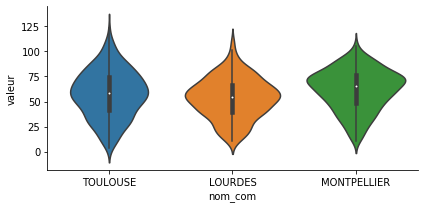

In [16]:
sns.catplot(x = 'nom_com', y = 'valeur', 
            data = df_villes,
            height = 3, aspect = 2,
            kind = 'violin')

# ceci n'est qu'un boxplot avec plein d'erreurs, il faut un widget, que doit on faire varier?
# il faudrait garder les mois pour faire un widget en fonction des mois
# il faut s'assurer que pour tous les mois, il y ait le bon nombre de données...

In [ ]:
def hist_explore(n_bins=24, alpha=0.25, density=False):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.hist(df_villes['valeur'], density=density,
            bins=n_bins, alpha=0.25)  # standardization
    plt.xlabel('valeur')
    plt.ylabel('Density level')
    plt.title("blabla")
    plt.tight_layout()
    plt.show()

In [ ]:
#interact(hist_explore, n_bins=(1, 50, 1), alpha=(0, 1, 0.1), density=False)

file_sizes: 10.9MB [00:39, 266kB/s]